## Import libraries

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import warnings
import warnings 
warnings.filterwarnings("ignore")


## Data Gathering

In [3]:
df= pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
stock_data= df
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [6]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [169]:
stock_data.describe()

x = df.drop("Date",axis = 1)
x 


,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


## Linearity 

In [159]:
stock_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


In [160]:
stock_data.var()

Open         1.178040e+04
High         1.193839e+04
Low          1.156826e+04
Close        1.172672e+04
Adj Close    1.172672e+04
Volume       2.987208e+13
dtype: float64

<Axes: >

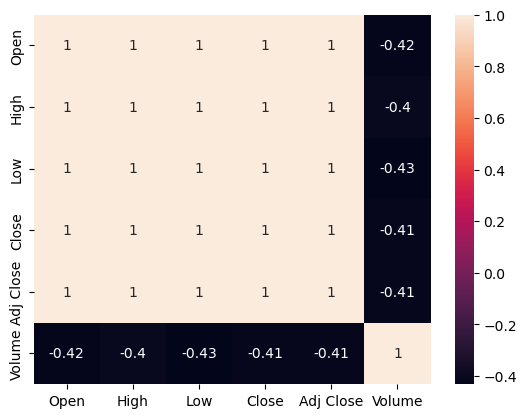

In [162]:
sns.heatmap(stock_data.corr(),annot = True)

In [86]:
correlation = stock_data.corr().tail(1)
correlation

,Open,High,Low,Close,Adj Close,Volume
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.0


<Axes: >

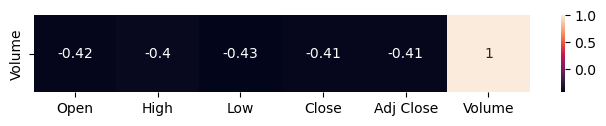

In [87]:
plt.figure(figsize = (8,1))
sns.heatmap(correlation ,annot = True)


## No Multicolinearity 

In [170]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [171]:
x = df.drop("Date",axis = 1)
#x =df.drop(columns=["Adj Close", "Date"])

x.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [172]:
data.shape[1]

6

In [173]:
x.to_numpy()

array([[2.62000000e+02, 2.67899994e+02, 2.50029999e+02, 2.54259995e+02,
        2.54259995e+02, 1.18961000e+07],
       [2.47699997e+02, 2.66700012e+02, 2.45000000e+02, 2.65720001e+02,
        2.65720001e+02, 1.25958000e+07],
       [2.66579987e+02, 2.72450012e+02, 2.64329987e+02, 2.64559998e+02,
        2.64559998e+02, 8.98150000e+06],
       ...,
       [4.48250000e+02, 4.51980011e+02, 4.26480011e+02, 4.29480011e+02,
        4.29480011e+02, 1.43460000e+07],
       [4.21440002e+02, 4.29260010e+02, 4.04279999e+02, 4.05600006e+02,
        4.05600006e+02, 9.90520000e+06],
       [4.07309998e+02, 4.12769989e+02, 3.96640015e+02, 4.10170013e+02,
        4.10170013e+02, 7.78240000e+06]])

In [174]:
vif_list = []
for i in range(x.shape[1] - 1): # i = 0
    vif = variance_inflation_factor(x.to_numpy(),i)
    print(f"VIF of {data.columns[i]} >> ",vif)
    vif_list.append(vif)

VIF of Open >>  12484.621419696437
VIF of High >>  16448.058736087296
VIF of Low >>  16178.223922904326
VIF of Close >>  inf
VIF of Adj Close >>  inf


In [167]:
vif_list

[12484.621419696437, 16448.058736087296, 16178.223922904326, inf, inf]

In [175]:
x = stock_data[['High','Low','Open','Volume']].values
y = stock_data['Volume'].values

In [176]:
x

array([[2.67899994e+02, 2.50029999e+02, 2.62000000e+02, 1.18961000e+07],
       [2.66700012e+02, 2.45000000e+02, 2.47699997e+02, 1.25958000e+07],
       [2.72450012e+02, 2.64329987e+02, 2.66579987e+02, 8.98150000e+06],
       ...,
       [4.51980011e+02, 4.26480011e+02, 4.48250000e+02, 1.43460000e+07],
       [4.29260010e+02, 4.04279999e+02, 4.21440002e+02, 9.90520000e+06],
       [4.12769989e+02, 3.96640015e+02, 4.07309998e+02, 7.78240000e+06]])

In [113]:
y

array([11896100, 12595800,  8981500, ..., 14346000,  9905200,  7782400],
      dtype=int64)

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 42)
                                

## Linear Regression Model

In [177]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [116]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [117]:
linear_reg.coef_

array([-6.61194398e-10,  6.78980649e-10,  1.41302469e-11,  1.00000000e+00])

In [119]:
linear_reg.intercept_

-1.4901161193847656e-08

## Model Evalution

In [126]:
y_pred = linear_reg.predict(x_test)
y_pred[0:20]

array([ 5608000.        ,  5910299.99999999,  4177400.        ,
        3930100.        , 16302500.00000001,  7359100.        ,
        5337000.        , 10559899.99999998,  6441500.        ,
        3671700.        ,  3503100.        ,  5782800.        ,
        4393100.        ,  5321000.        ,  9234500.        ,
        2791700.        ,  4325300.        ,  1625100.        ,
       15646200.00000001,  9252500.        ])

In [127]:
y_test[0:20] #actualy_

array([ 5608000,  5910300,  4177400,  3930100, 16302500,  7359100,
        5337000, 10559900,  6441500,  3671700,  3503100,  5782800,
        4393100,  5321000,  9234500,  2791700,  4325300,  1625100,
       15646200,  9252500], dtype=int64)

## Evalution On Testing Data

In [132]:
mse = mean_squared_error(y_test, y_pred)
print("mean squared error = ",mse)
print("--"*60)

rmse= np.sqrt(mse)
print("root mean square error = ",rmse)
print("--"*60)

mae= mean_absolute_error(y_test,y_pred)
print("mean absolute error =", mae)
print("--"*60)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value  =", r_squared)


mean squared error =  2.7716662418844163e-17
------------------------------------------------------------------------------------------------------------------------
root mean square error =  5.264661662333503e-09
------------------------------------------------------------------------------------------------------------------------
mean absolute error = 3.491307027859263e-09
------------------------------------------------------------------------------------------------------------------------
R Squared Value  = 1.0


## Evalution On Training  Data

In [133]:
y_pred_train= linear_reg.predict(x_train)
y_pred_train[0:10]

array([9925200., 7541400., 4772900., 5416600., 2534900., 7036100.,
       8376600., 3833500., 6821600., 4615500.])

In [137]:
y_train[0:10]

array([9925200, 7541400, 4772900, 5416600, 2534900, 7036100, 8376600,
       3833500, 6821600, 4615500], dtype=int64)

In [138]:
mse = mean_squared_error(y_train, y_pred_train)
print("mean squared error = ",mse)
print("--"*60)

rmse= np.sqrt(mse)
print("root mean square error = ",rmse)
print("--"*60)

mae= mean_absolute_error(y_train,y_pred_train)
print("mean absolute error =", mae)
print("--"*60)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value  =", r_squared)


mean squared error =  3.086254704572802e-17
------------------------------------------------------------------------------------------------------------------------
root mean square error =  5.555407009907377e-09
------------------------------------------------------------------------------------------------------------------------
mean absolute error = 3.390037252705041e-09
------------------------------------------------------------------------------------------------------------------------
R Squared Value  = 1.0


## Normality of Residual
### kde plot

In [140]:
mse = (((y_train - y_pred_train)**2).sum()) / 404 
mse

6.164870164827354e-17

In [147]:
residual = y_train - y_pred_train
residual[0:10]

array([-1.86264515e-09,  0.00000000e+00,  1.86264515e-09,  1.86264515e-09,
        9.31322575e-10,  9.31322575e-10, -1.86264515e-09,  1.39698386e-09,
        9.31322575e-10,  3.72529030e-09])

<Axes: ylabel='Density'>

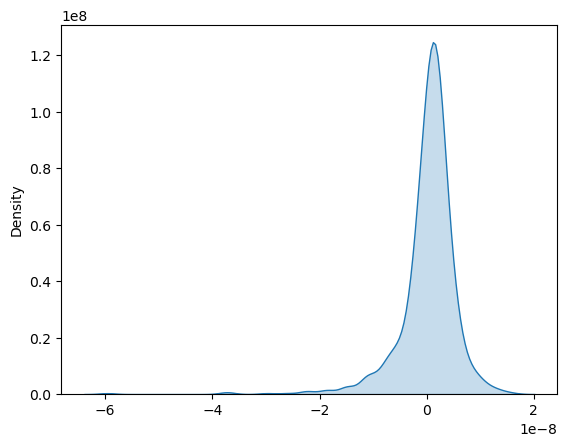

In [146]:
sns.kdeplot(residual, fill= True)

<Axes: ylabel='Count'>

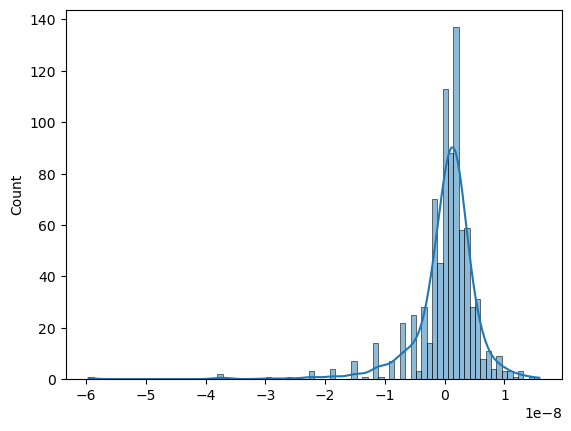

In [148]:
sns.histplot(residual,fill = True,kde = True)

## QQ plot

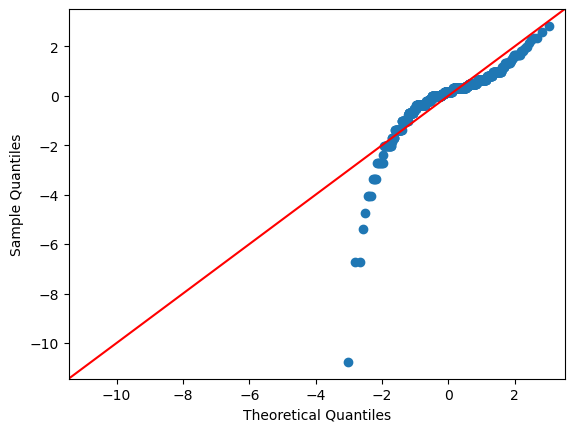

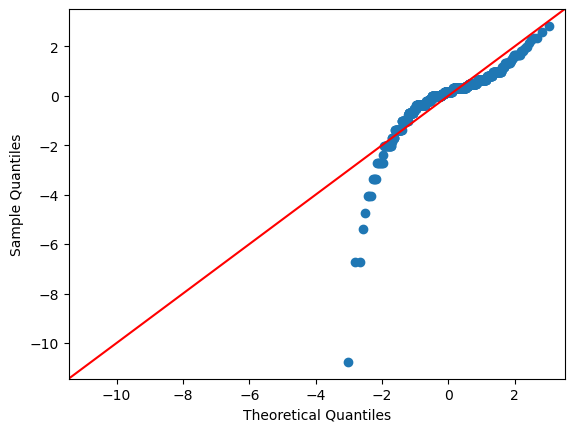

In [152]:
sm.qqplot(residual,line = "45",fit = True)

<Axes: >

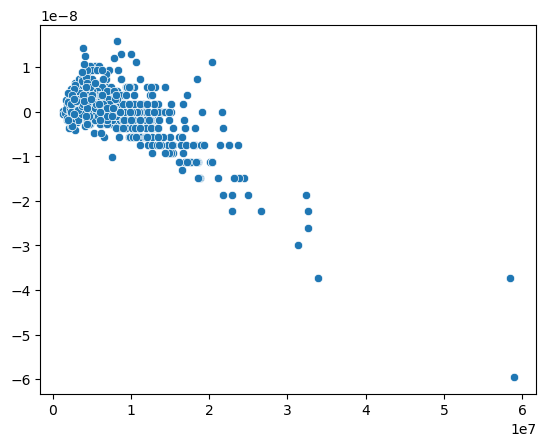

In [153]:
sns.scatterplot(x = y_train,y = residual)